<a href="https://colab.research.google.com/github/harbidel/Lung-Cancer-Model-Deploy-to-Production/blob/main/Lung_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LUNG CANCER PREDICTION MODEL**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('/content/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

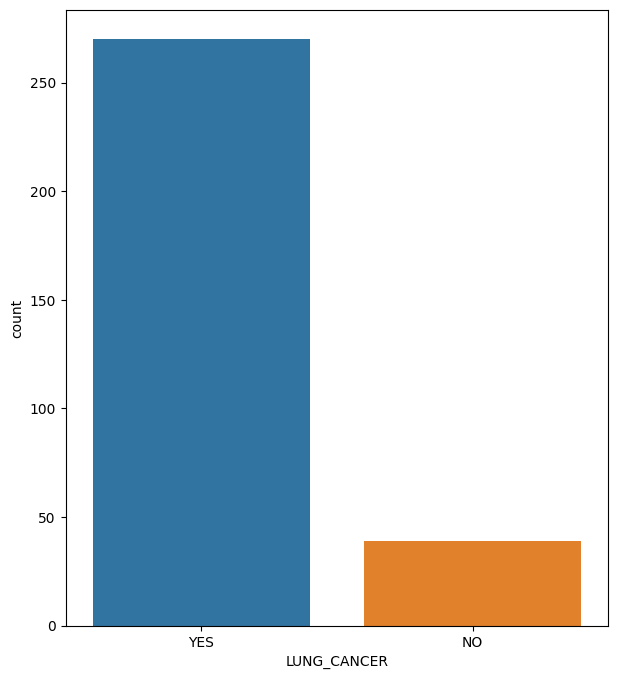

In [4]:
# plotting graph for output classes counts

plt.figure(figsize=(7,8))
sns.countplot(x = 'LUNG_CANCER',data = data)

<Axes: xlabel='GENDER', ylabel='count'>

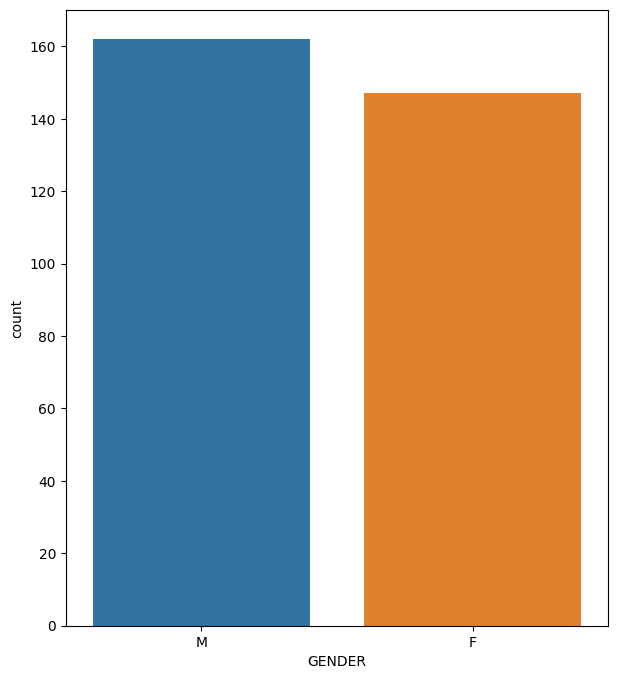

In [5]:
# plotting graph for output classes counts

plt.figure(figsize=(7,8))
sns.countplot(x = 'GENDER',data = data)

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['GENDER']= lb.fit_transform(data['GENDER'])
data['LUNG_CANCER']= lb.fit_transform(data['LUNG_CANCER'])

In [7]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>],
       [<Axes: title={'center': 'ALLERGY '}>,
        <Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS OF BREATH'}>,
        <Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>]], dtype=object)

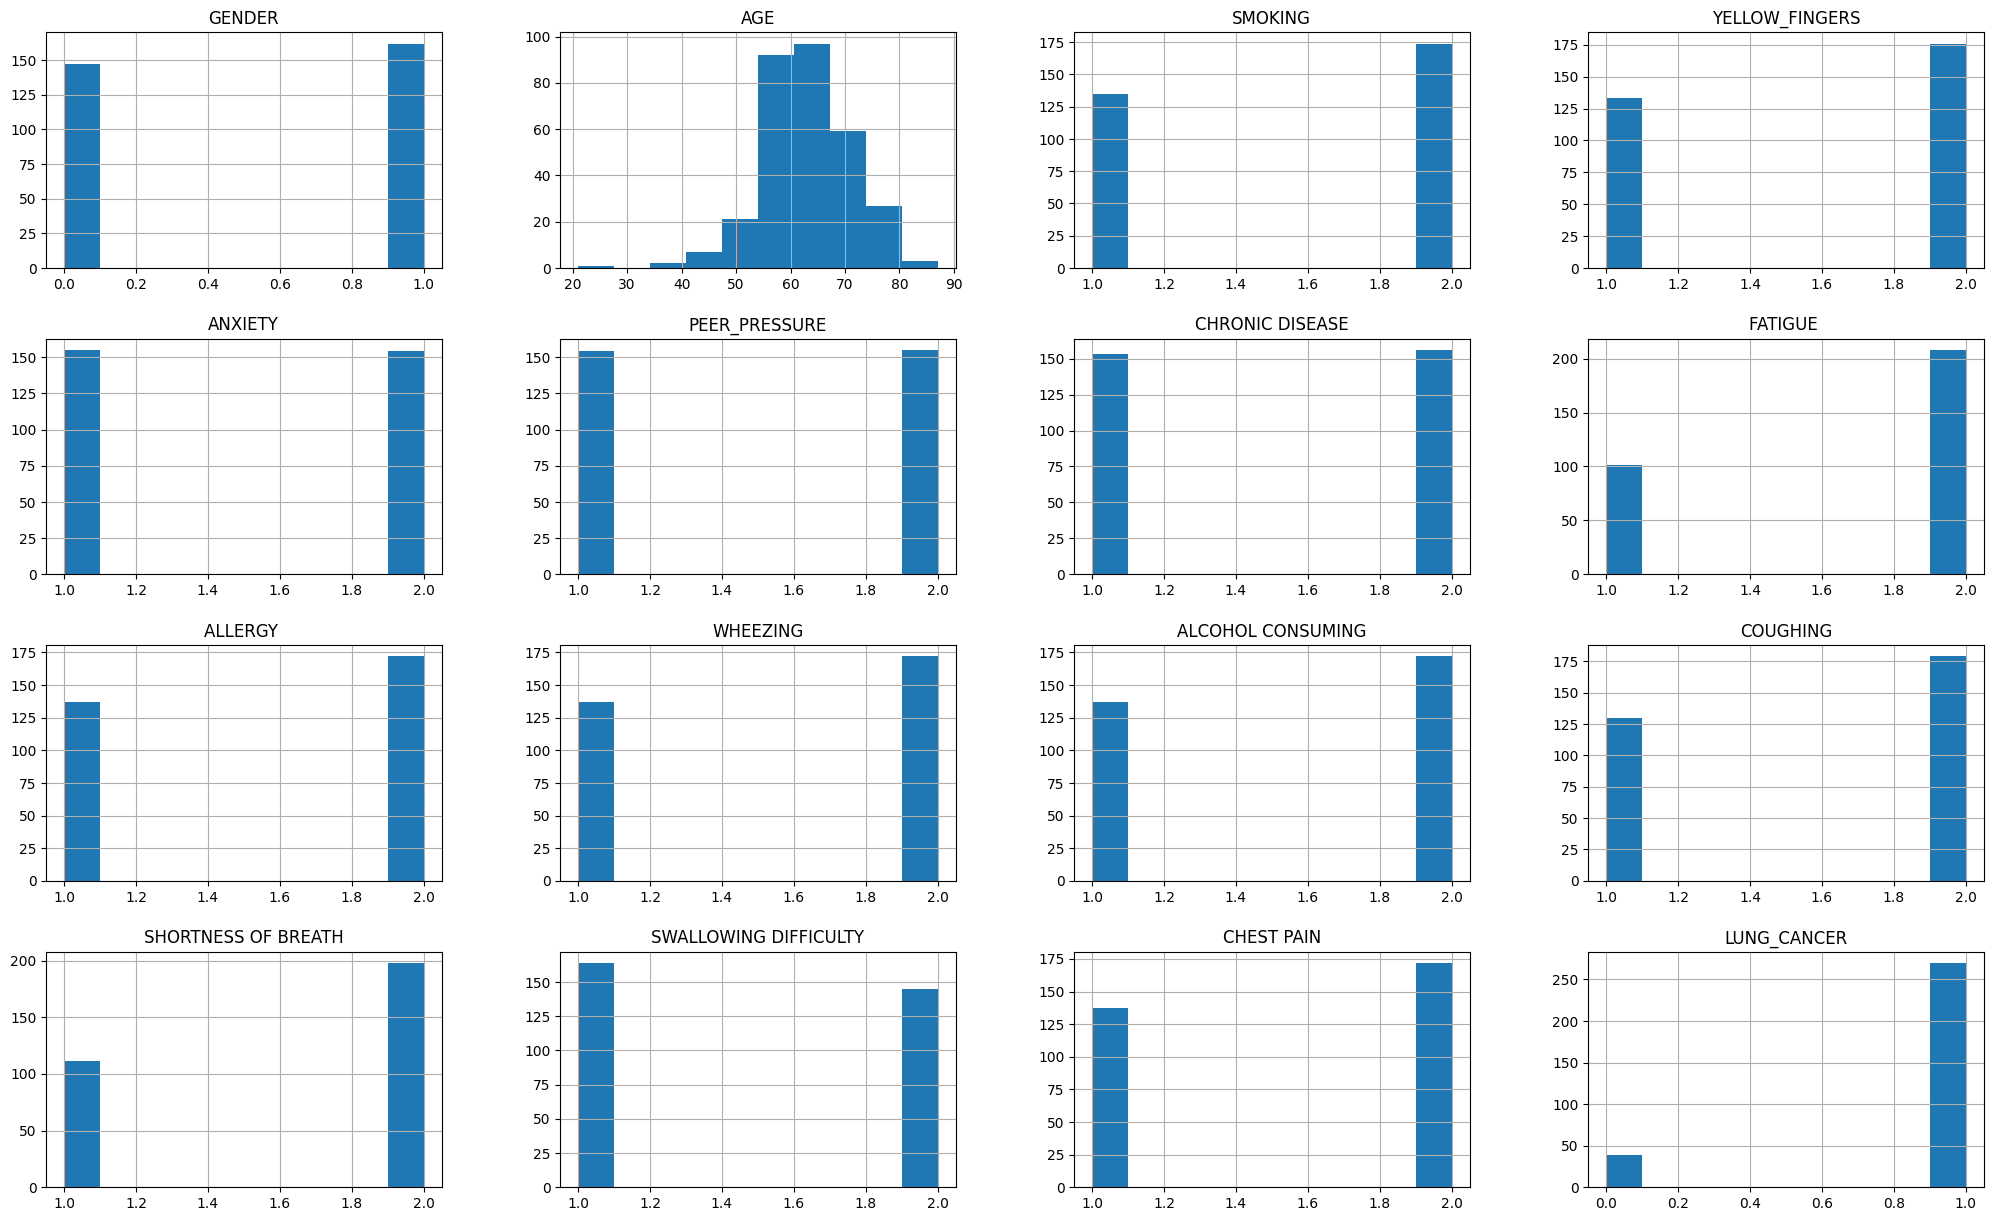

In [8]:
# plotting variation graphs for each property

data.hist(figsize = (25,15))

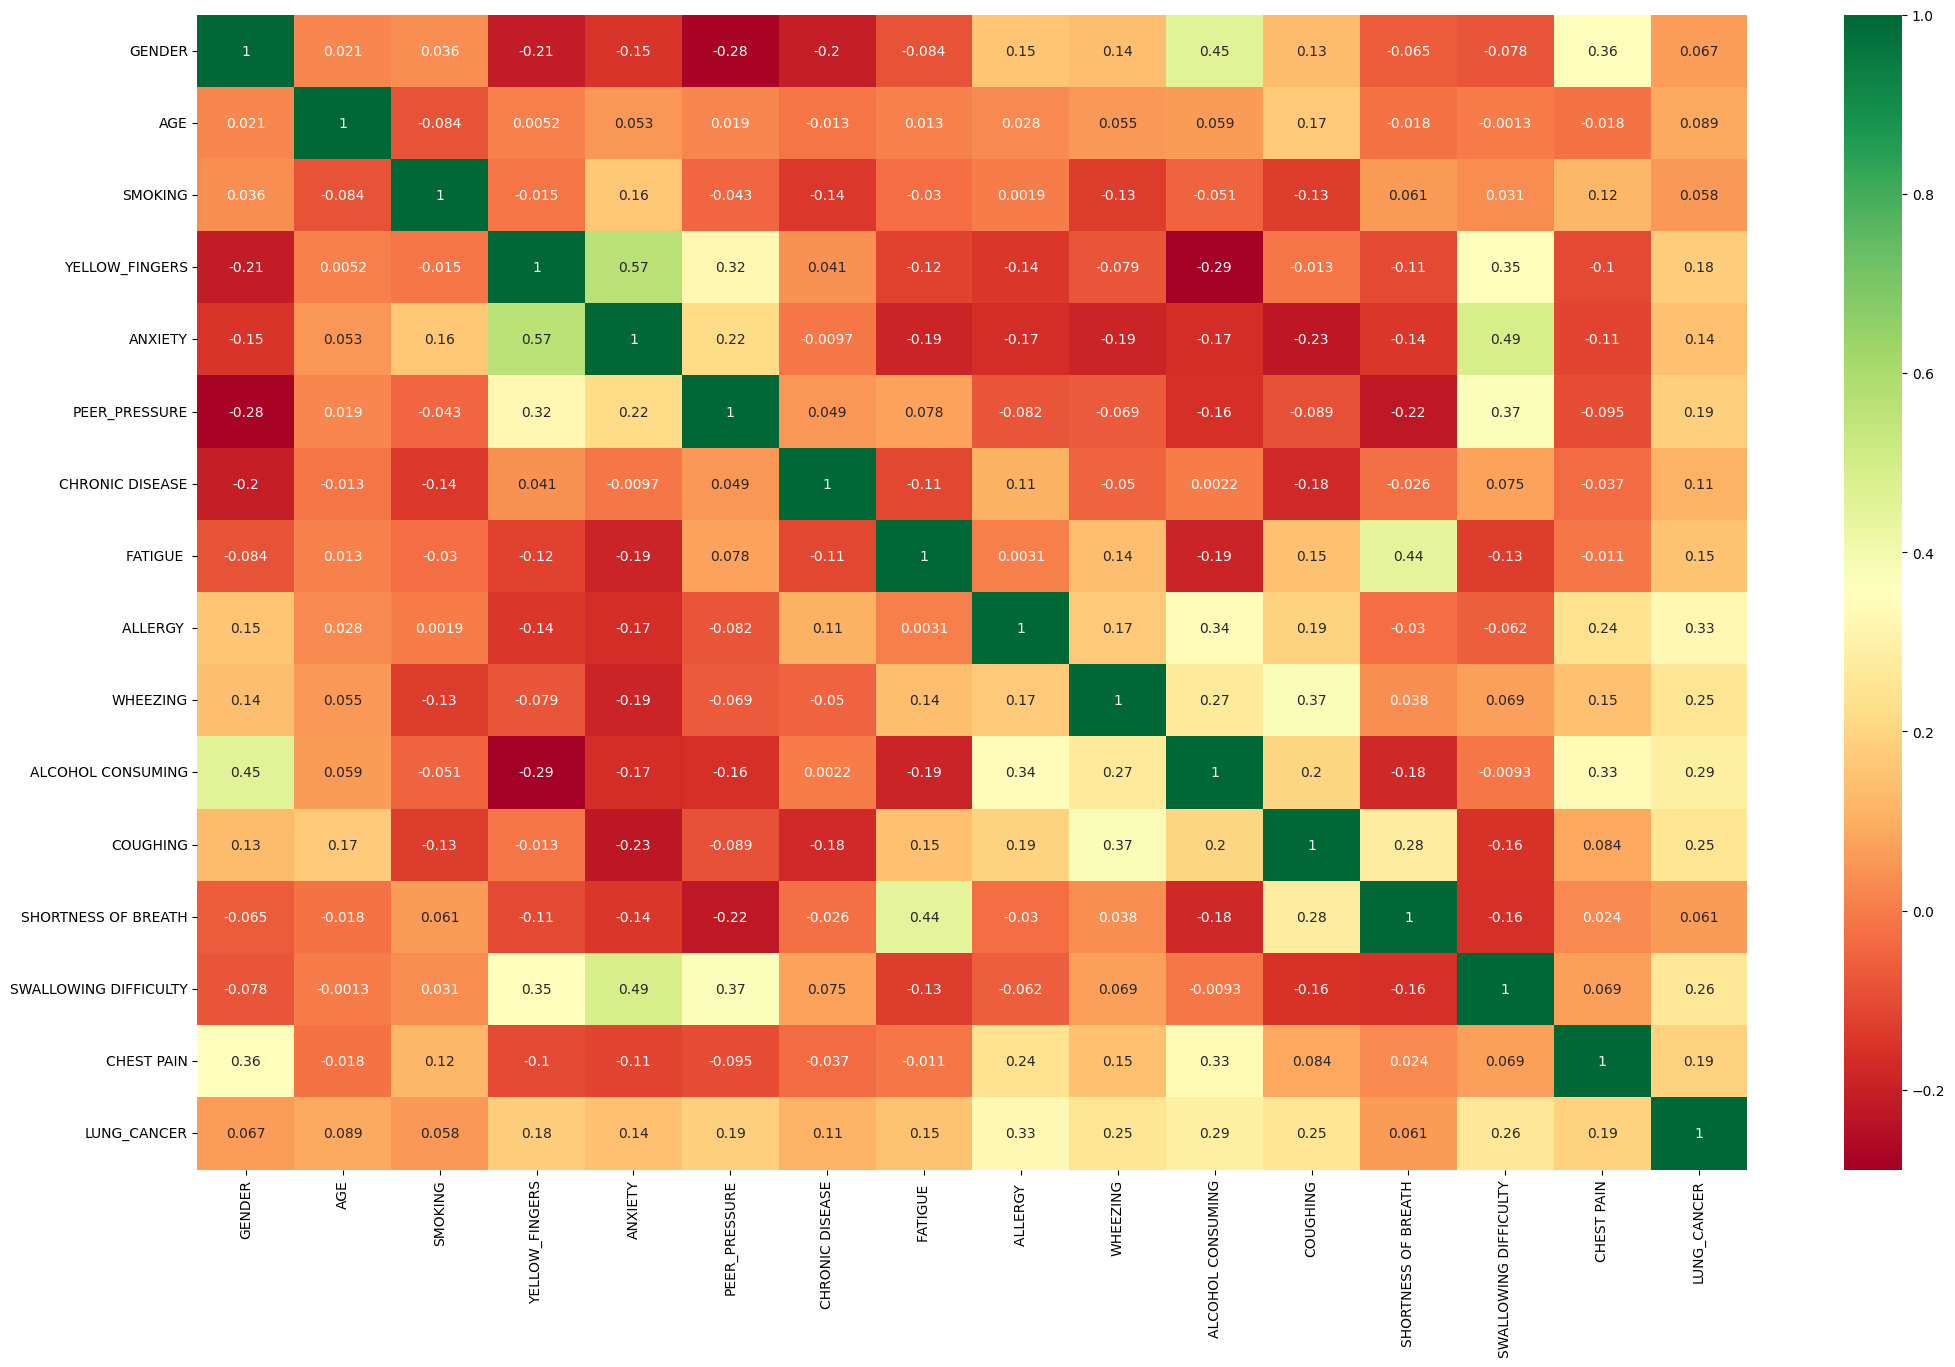

In [9]:
# Plotting the correlation heatmap
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,15))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [12]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
126,1,51,2,1,1,1,1,2,1,2,2,2,2,1,2
109,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2
247,1,67,1,2,1,1,1,2,1,2,2,2,2,1,1
234,1,77,1,2,1,2,1,2,2,2,2,2,1,1,1
202,1,74,2,1,1,1,2,2,2,2,2,1,1,2,2


In [15]:
X_test.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
288,0,61,1,2,2,2,1,1,2,2,1,2,1,2,1
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2
57,1,73,1,1,1,1,2,1,2,1,2,2,2,2,2
60,1,70,1,2,1,2,2,2,2,2,2,2,1,2,2
25,1,65,1,2,2,1,1,2,1,2,2,2,2,2,2


# RandomForest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

In [21]:
# Prediction
y_pred = model.predict(X_test)

In [22]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



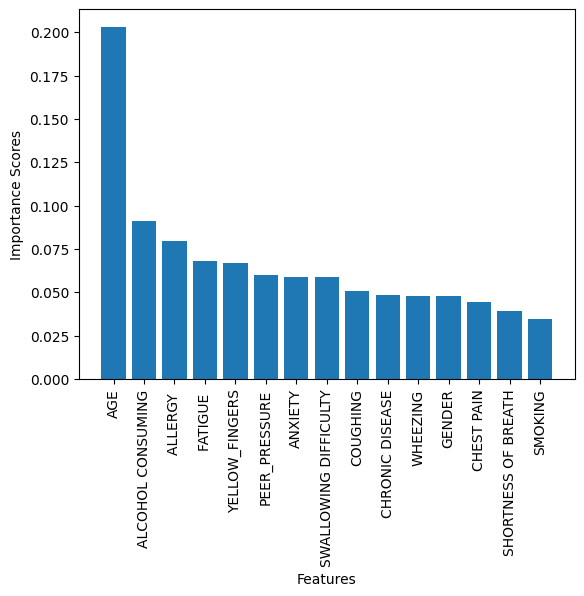

In [23]:
# Get feature importances from the trained random forest classifier
importance_scores = model.feature_importances_

# Sort the feature importances and corresponding feature names in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_features = X_train.columns[sorted_indices]  # Assuming you have named columns in your dataset

# Visualize the feature importances
plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.show()


In [24]:
import pickle

pickle_file = open('model.pkl', 'ab')
pickle.dump(model, pickle_file)
pickle_file.close()